In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
from subprocess import run, call, Popen, PIPE
import os
from time import time, sleep
from helpers import *

In [2]:
# Compile the chat module first

result = run(['g++', os.path.join(os.path.split(os.getcwd())[0], 'Source.cpp'), '-o', os.path.join(os.getcwd(), 'out.exe')], capture_output=True, text=True)
print(result.stdout)

In [3]:
#Helper functions

def isPrime(n):
      
    # Corner case
    if n <= 1 :
        return False
  
    # check from 2 to n-1
    for i in range(2, n):
        if n % i == 0:
            return False
  
    return True
  
# Function to print primes
def constructPrimeList(n):
    primesList = []
    for i in range(2, n + 1):
        if isPrime(i):
            primesList.append(i)
    #print(f"Primes List to be tested are:\n{primesList}")
    return primesList

In [4]:
sampleMessage = 'Hello0This0is0a0test0message0just0built0to0mess0with0your0code0muahahahaha'

timeCounter = []
keyLength = []

# enter an upper limit number here
primesList = constructPrimeList(1000)

#just remove the last prime, if the primes are not pairs
if len(primesList)%2 != 0: primesList = primesList[:-1]




for i in range(0, len(primesList), 2):
    p = primesList[i]
    q = primesList[i+1]
    n = p*q
    keyLength.append(len(bin(n)[2:]))

    with open ('receiver_input.txt', 'w') as l:
        l.write(' '.join([str(p),str(q)]))
    

    startTime = time()*1000
    #call the chat module
    result = run(['out.exe', sampleMessage], capture_output=True, text=True)
    endTime = time()*1000

    timeCounter.append(endTime - startTime)



#print(keyLength)
#print(timeCounter)

In [5]:
#this is just to take the average time of numbers having the same key length

graph_data = {}

for i,j in zip(keyLength, timeCounter):
    if i in graph_data.keys():
        graph_data[i] = (graph_data[i] + j) / 2
    else:
        graph_data[i] = j

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


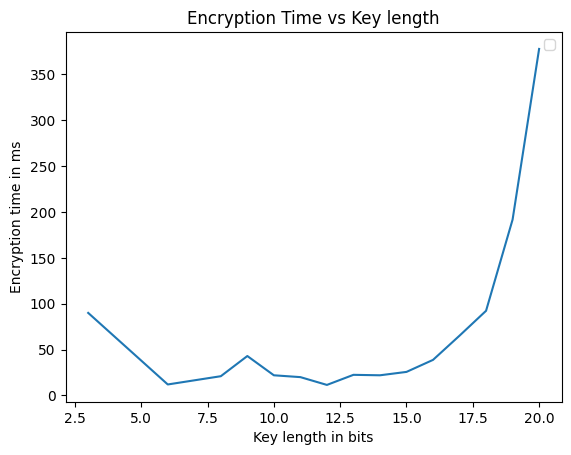

In [6]:
plt.plot(graph_data.keys(), graph_data.values())
plt.xlabel("Key length in bits")
plt.ylabel("Encryption time in ms")
plt.title('Encryption Time vs Key length')
plt.legend()
plt.savefig('encTime.png')
plt.show()